In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Check how a players college stats factor to how long they play in the league. The main college stats that i will be focusing on is their field goal percentage and their average points per game

In [199]:
team_box = pd.read_csv('teamBoxScore.csv')
standings = pd.read_csv('standings.csv')
player_box = pd.read_csv('playerBoxScore.csv')
official_box = pd.read_csv('officialBoxScore.csv')
college = pd.read_csv('college.csv')
college

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,4571,2018,2018,"January 4, 1997",NaN,6-11,Ante Zizic,F-C,/players/z/zizican01.html,250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4572,4572,1983,1983,"December 20, 1953",Kent State University,7-1,Jim Zoet,C,/players/z/zoetji01.html,240.0,...,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,4573,1971,1971,"June 7, 1948",Duquesne University,6-1,Bill Zopf,G,/players/z/zopfbi01.html,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4574,4574,2017,2018,"March 18, 1997",NaN,7-1,Ivica Zubac,C,/players/z/zubaciv01.html,265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
college.columns

Index(['Unnamed: 0', 'active_from', 'active_to', 'birth_date', 'college',
       'height', 'name', 'position', 'url', 'weight', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')

In [201]:
col = ['Unnamed: 0','birth_date', 'height', 'position', 'url', 'weight', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',]

In [202]:
def drop_cols(df):
    return df.drop(columns=col)

In [203]:
college_data = college.pipe(drop_cols)
college_data

,active_from,active_to,college,name,NCAA_fgpct,NCAA_ppg
0,1991,1995,Duke University,Alaa Abdelnaby,0.599,8.5
1,1969,1978,Iowa State University,Zaid Abdul-Aziz,NaN,NaN
2,1970,1989,"University of California, Los Angeles",Kareem Abdul-Jabbar,0.639,26.4
3,1991,2001,Louisiana State University,Mahmoud Abdul-Rauf,0.474,29.0
4,1998,2003,"University of Michigan, San Jose State University",Tariq Abdul-Wahad,NaN,NaN
...,...,...,...,...,...,...
4571,2018,2018,NaN,Ante Zizic,NaN,NaN
4572,1983,1983,Kent State University,Jim Zoet,0.476,3.2
4573,1971,1971,Duquesne University,Bill Zopf,NaN,NaN
4574,2017,2018,NaN,Ivica Zubac,NaN,NaN


In [204]:
years_played = (college_data['active_to'] - college_data['active_from']).to_numpy()
years_played

array([ 4,  9, 19, ...,  0,  1,  0])

In [205]:
college_data['years'] = years_played
college_data

,active_from,active_to,college,name,NCAA_fgpct,NCAA_ppg,years
0,1991,1995,Duke University,Alaa Abdelnaby,0.599,8.5,4
1,1969,1978,Iowa State University,Zaid Abdul-Aziz,NaN,NaN,9
2,1970,1989,"University of California, Los Angeles",Kareem Abdul-Jabbar,0.639,26.4,19
3,1991,2001,Louisiana State University,Mahmoud Abdul-Rauf,0.474,29.0,10
4,1998,2003,"University of Michigan, San Jose State University",Tariq Abdul-Wahad,NaN,NaN,5
...,...,...,...,...,...,...,...
4571,2018,2018,NaN,Ante Zizic,NaN,NaN,0
4572,1983,1983,Kent State University,Jim Zoet,0.476,3.2,0
4573,1971,1971,Duquesne University,Bill Zopf,NaN,NaN,0
4574,2017,2018,NaN,Ivica Zubac,NaN,NaN,1


In [206]:
null_rows = college_data.isnull().any(axis = 1)
college_data[null_rows]

,active_from,active_to,college,name,NCAA_fgpct,NCAA_ppg,years
1,1969,1978,Iowa State University,Zaid Abdul-Aziz,NaN,NaN,9
4,1998,2003,"University of Michigan, San Jose State University",Tariq Abdul-Wahad,NaN,NaN,5
7,1957,1957,Western Kentucky University,Forest Able,NaN,NaN,0
8,1947,1948,Salem International University,John Abramovic,NaN,NaN,1
9,2017,2018,NaN,Alex Abrines,NaN,NaN,1
...,...,...,...,...,...,...,...
4570,2017,2018,NaN,Paul Zipser,NaN,NaN,1
4571,2018,2018,NaN,Ante Zizic,NaN,NaN,0
4573,1971,1971,Duquesne University,Bill Zopf,NaN,NaN,0
4574,2017,2018,NaN,Ivica Zubac,NaN,NaN,1


In [207]:
college_data.shape

(4576, 7)

In [349]:
college_data = college_data.dropna()
college_data

,active_from,active_to,college,name,NCAA_fgpct,NCAA_ppg,years
0,1991,1995,Duke University,Alaa Abdelnaby,0.599,8.5,4
2,1970,1989,"University of California, Los Angeles",Kareem Abdul-Jabbar,0.639,26.4,19
3,1991,2001,Louisiana State University,Mahmoud Abdul-Rauf,0.474,29.0,10
5,1997,2008,University of California,Shareef Abdur-Rahim,0.518,21.1,11
6,1977,1981,Indiana University,Tom Abernethy,0.533,5.9,4
...,...,...,...,...,...,...,...
4565,1988,1988,"Seattle Pacific University, University of Wash...",Phil Zevenbergen,0.501,10.1,0
4567,1996,1998,"University of California, Los Angeles",George Zidek,0.520,7.1,2
4568,2006,2006,Mississippi State University,Derrick Zimmerman,0.477,6.9,0
4569,2017,2017,"University of Nevada, Las Vegas",Stephen Zimmerman,0.477,10.5,0


Removed all the rows that contained any null values to have sample to work with.

In [209]:
college_data.shape

(2582, 7)

In [326]:
colleges = college_data.groupby(['college'], axis = 0).sum()
colleges

,active_from,active_to,NCAA_fgpct,NCAA_ppg,years
college,,,,,
Alabama A&M University,2012,2012,0.442,7.3,0
"Albertson College of Idaho, Seattle University",1959,1972,0.498,31.2,13
Alcorn State University,3967,3981,1.086,32.2,14
"Alcorn State University, Jackson State University",4003,4022,0.838,41.1,19
American University,1974,1988,0.501,20.1,14
...,...,...,...,...,...
"Wichita State University, University of Texas at Austin",2002,2012,0.432,16.5,10
"Winston-Salem State University, Oral Roberts University",1990,2000,0.425,17.7,10
Wright State University,3991,4001,1.113,40.1,10


In [294]:
college_players = college_data['college'].value_counts()  #.sort_values('college', ascending = True)
college_players 
output = pd.DataFrame(data = college_players).sort_values('college', ascending = False).rename(columns = {'college':'count' })
output.head()

,count
"University of California, Los Angeles",73
University of Kentucky,68
University of North Carolina,66
University of Kansas,53
Duke University,53


In [292]:
combined = colleges.join(output, 'college')
combined.head()

,active_from,active_to,NCAA_fgpct,NCAA_ppg,years,count
college,,,,,,
Alabama A&M University,2012,2012,0.442,7.3,0,1
"Albertson College of Idaho, Seattle University",1959,1972,0.498,31.2,13,1
Alcorn State University,3967,3981,1.086,32.2,14,2
"Alcorn State University, Jackson State University",4003,4022,0.838,41.1,19,2
American University,1974,1988,0.501,20.1,14,1


In [293]:
grouped = college_data.groupby(['college']).mean().sort_values('college', ascending = True)
grouped.head()

,active_from,active_to,NCAA_fgpct,NCAA_ppg,years
college,,,,,
Alabama A&M University,2012.0,2012.0,0.442,7.30,0.0
"Albertson College of Idaho, Seattle University",1959.0,1972.0,0.498,31.20,13.0
Alcorn State University,1983.5,1990.5,0.543,16.10,7.0
"Alcorn State University, Jackson State University",2001.5,2011.0,0.419,20.55,9.5
American University,1974.0,1988.0,0.501,20.10,14.0


In [335]:
college_ranking = grouped['years'] / combined['count']
veteran = pd.DataFrame(data = college_ranking)
veteran_players = colleges.join(veteran, 'college').rename(columns = {0:'average_years'}).sort_values('college', ascending = True)
veteran_players

,active_from,active_to,NCAA_fgpct,NCAA_ppg,years,average_years
college,,,,,,
Alabama A&M University,2012,2012,0.442,7.3,0,0.000000
"Albertson College of Idaho, Seattle University",1959,1972,0.498,31.2,13,13.000000
Alcorn State University,3967,3981,1.086,32.2,14,3.500000
"Alcorn State University, Jackson State University",4003,4022,0.838,41.1,19,4.750000
American University,1974,1988,0.501,20.1,14,14.000000
...,...,...,...,...,...,...
"Wichita State University, University of Texas at Austin",2002,2012,0.432,16.5,10,10.000000
"Winston-Salem State University, Oral Roberts University",1990,2000,0.425,17.7,10,10.000000
Wright State University,3991,4001,1.113,40.1,10,2.500000


In [359]:
visual = veteran_players
visual['count'] = combined['count'].to_numpy()
visualize = visual.sort_values('count', ascending = False).head(-5)
visualize

,active_from,active_to,NCAA_fgpct,NCAA_ppg,years,average_years,count
college,,,,,,,
"University of California, Los Angeles",145589,146036,36.921,842.1,447,0.083881,73
University of Kentucky,136188,136525,33.614,844.2,337,0.072881,68
University of North Carolina,131739,132207,34.051,811.6,468,0.107438,66
University of Kansas,106048,106329,26.570,626.3,281,0.100036,53
Duke University,106102,106383,26.522,686.9,281,0.100036,53
...,...,...,...,...,...,...,...
Indiana University-Purdue University Indianapolis,2009,2018,0.529,17.0,9,9.000000,1
"University of California, Los Angeles, Loyola Marymount University",1989,1995,0.504,8.0,6,6.000000,1
"University of California, Los Angeles, University of Nevada, Las Vegas",1981,1981,0.491,6.8,0,0.000000,1


Text(0.5, 1.0, 'Average years they spend in the NBA')

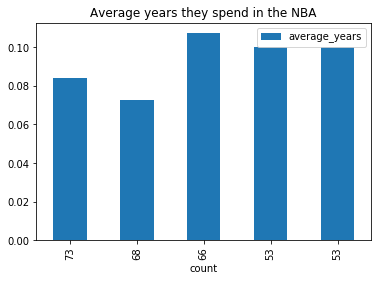

In [357]:
display = visualize.plot.bar(x='count', y='average_years')
display.set_title('Average years they spend in the NBA')

In [76]:
team_box.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790


In [77]:
standings.head()

,stDate,teamAbbr,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,...,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5
0,2012-10-30,ATL,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
1,2012-10-30,BKN,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
2,2012-10-30,BOS,14,14th,0,1,L1,loss,1,1.0,...,0.0,-13.0,-13.0,0.072,0.1687,13.8334,68.1666,0.131,10.742,71.258
3,2012-10-30,CHA,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
4,2012-10-30,CHI,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000


In [78]:
player_box.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1.0,1.0,2.0,CLE,East,Central,Home,Win,0.0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1.0,2.0,3.0,CLE,East,Central,Home,Win,0.0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5.0,2.0,7.0,CLE,East,Central,Home,Win,0.0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0.0,3.0,3.0,CLE,East,Central,Home,Win,0.0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1.0,0.0,1.0,CLE,East,Central,Home,Win,0.0


In [79]:
official_box.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


In [80]:
a = college.fillna(0)
a.head()

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,...,0.0,0.0,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,...,0.0,0.0,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,...,2.7,0.0,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0


Which college produes the best rebounders, 3 point shooters, scorers, defenders? Which colleges prodice the longest tentured NBA players? 

In [193]:
#main data set to build on
b = a[['college','name', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg']]
copyb = b
b.head()

,college,name,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,Duke University,Alaa Abdelnaby,0.0,0.000,0.0,0.0,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,Iowa State University,Zaid Abdul-Aziz,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
2,"University of California, Los Angeles",Kareem Abdul-Jabbar,0.0,0.000,0.0,0.0,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,Louisiana State University,Mahmoud Abdul-Rauf,7.2,0.372,2.7,0.0,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,"University of Michigan, San Jose State University",Tariq Abdul-Wahad,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0


In [82]:
x = b.groupby('college', as_index = False).sum().sort_values('NCAA__3ptapg', ascending = False)
x.head()

,college,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
512,University of Kentucky,127.7,15.196,45.9,0.0,632.1,33.815,308.6,48.711,255.4,181.9,5700.0,844.2
127,Duke University,115.6,15.151,44.3,0.0,495.9,26.522,244.2,38.467,210.4,154.7,5595.0,686.9
447,University of Arizona,97.6,12.872,38.2,0.0,385.2,20.525,188.4,30.213,161.1,115.8,4071.0,528.3
464,"University of California, Los Angeles",96.3,14.457,35.2,0.0,630.2,36.921,320.0,50.470,241.6,168.8,6831.0,842.1
572,University of North Carolina,95.8,12.993,36.7,0.0,593.5,34.051,304.5,46.829,238.7,170.0,7071.0,811.6


In [83]:
top = x.head(10)
top

,college,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
512,University of Kentucky,127.7,15.196,45.9,0.0,632.1,33.815,308.6,48.711,255.4,181.9,5700.0,844.2
127,Duke University,115.6,15.151,44.3,0.0,495.9,26.522,244.2,38.467,210.4,154.7,5595.0,686.9
447,University of Arizona,97.6,12.872,38.2,0.0,385.2,20.525,188.4,30.213,161.1,115.8,4071.0,528.3
464,"University of California, Los Angeles",96.3,14.457,35.2,0.0,630.2,36.921,320.0,50.470,241.6,168.8,6831.0,842.1
572,University of North Carolina,95.8,12.993,36.7,0.0,593.5,34.051,304.5,46.829,238.7,170.0,7071.0,811.6
165,Georgia Institute of Technology,79.9,8.535,29.9,0.0,305.7,15.193,148.7,22.259,116.7,83.8,2916.0,409.1
509,University of Kansas,75.3,14.146,29.0,0.0,468.5,26.570,231.6,36.620,194.8,134.5,5200.0,626.3
484,University of Connecticut,73.3,8.494,26.8,0.0,310.6,15.101,143.5,22.586,121.9,87.1,3340.0,401.0
415,Syracuse University,67.8,8.603,23.5,0.0,340.7,17.819,166.7,24.728,140.9,97.2,3633.0,453.6
536,University of Michigan,64.5,8.194,23.6,0.0,395.7,19.174,197.2,27.435,133.2,96.0,3660.0,512.4


Text(0.5, 1.0, 'Best 3pt average team in all history')

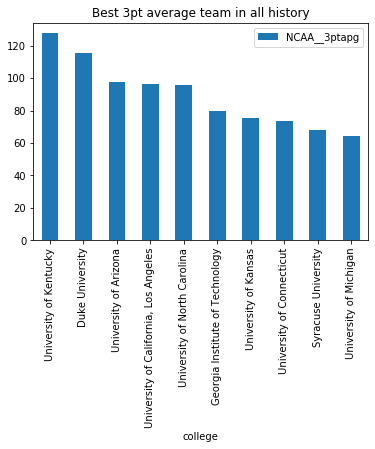

In [84]:
ax = top.plot.bar(x = 'college', y = 'NCAA__3ptapg')
ax.set_title('Best 3pt average team in all history')

In [85]:
def goodshooter(x):
    if x < 1:
        return 0
    elif x < 3:
        return 1
    elif x < 5:
        return 2
    elif x < 7:
        return 3
    else:
        return 4

In [86]:
x = b['NCAA__3ptapg'].apply(goodshooter)
b.insert(2, "Shooter_grade", x, False) 
b

,college,name,Shooter_grade,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,Duke University,Alaa Abdelnaby,0,0.0,0.000,0.0,0.0,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,Iowa State University,Zaid Abdul-Aziz,0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
2,"University of California, Los Angeles",Kareem Abdul-Jabbar,0,0.0,0.000,0.0,0.0,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,Louisiana State University,Mahmoud Abdul-Rauf,4,7.2,0.372,2.7,0.0,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,"University of Michigan, San Jose State University",Tariq Abdul-Wahad,0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,0,Ante Zizic,0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4572,Kent State University,Jim Zoet,0,0.0,0.000,0.0,0.0,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,Duquesne University,Bill Zopf,0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4574,0,Ivica Zubac,0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0


In [87]:
b['Shooter_grade'].value_counts()

0    3395
1     502
2     422
3     225
4      32
Name: Shooter_grade, dtype: int64

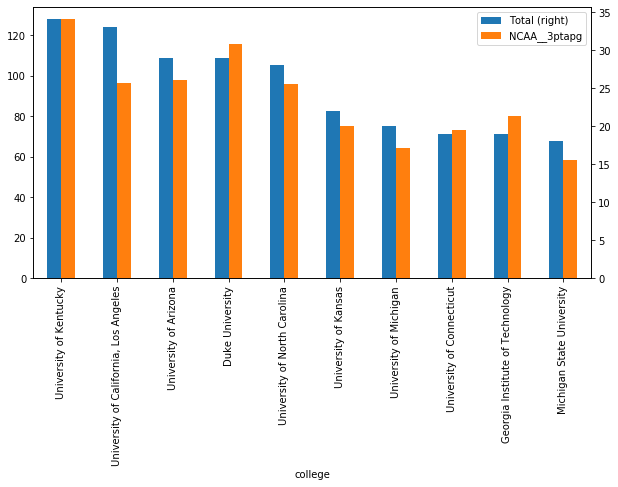

In [88]:
copied = b
copied.sort_values("Shooter_grade", ascending = False)
table = copied.pivot_table(index = "college", columns = "Shooter_grade", values = "NCAA__3ptpg", aggfunc=np.size).fillna(0)
table = table.drop(0, axis=1)
table["Total"] = table.sum(axis=1)
table = table.drop(table.index[0])
table.sort_values('Total', ascending = False).head(10)
x = b.groupby('college', as_index = False).sum().sort_values('NCAA__3ptapg', ascending = False)
merged = table.merge(x, on = 'college', how = 'left')
merged = merged[['college','Total', 'NCAA__3ptapg']]


stats = merged.sort_values('Total', ascending = False).head(10)
stats.plot( kind= 'bar', x = 'college' , secondary_y= 'Total' , rot= 90, figsize=(10,5))
plt.show()

In [194]:
data1 = copyb.drop(['college', 'name'], axis = 1)
data1

,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0.0,0.000,0.0,0.0,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0,0.000,0.0,0.0,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,7.2,0.372,2.7,0.0,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4572,0.0,0.000,0.0,0.0,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4574,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0


In [302]:
games = team_box[['gmDate','teamAbbr', 'teamPTS', 'teamAST',
       'teamTO', 'teamSTL', 'teamBLK']]
games['Year'] = games['gmDate'].str[:4]
games

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gmDate,teamAbbr,teamPTS,teamAST,teamTO,teamSTL,teamBLK,Year
0,2012-10-30,WAS,84,26,13,11,10,2012
1,2012-10-30,CLE,94,22,21,7,5,2012
2,2012-10-30,BOS,107,24,16,4,2,2012
3,2012-10-30,MIA,120,25,8,8,5,2012
4,2012-10-30,DAL,99,22,12,9,5,2012
...,...,...,...,...,...,...,...,...
14753,2018-04-11,LAC,100,27,17,8,1,2018
14754,2018-04-11,UTA,93,18,15,5,7,2018
14755,2018-04-11,POR,102,19,10,9,9,2018
14756,2018-04-11,HOU,83,11,14,2,6,2018


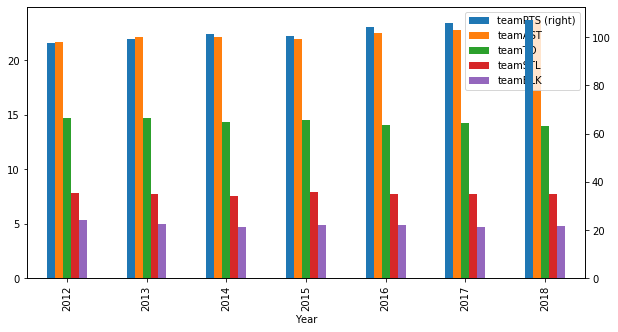

In [303]:
g = games.groupby('Year', as_index = False).mean()
g.plot( kind= 'bar', x = 'Year', secondary_y= 'teamPTS', rot= 90, figsize=(10,5))

In [304]:
Grading = (a['NBA_efgpct']*a['NBA_fga_per_game'] + a['NBA_ft%']* a['NBA_fta_p_g']).to_numpy()
a['NBA_Good'] = Grading
a = a.sort_values('NBA_Good', ascending = True)
a

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,NBA_Good
297,297,2012,2012,"August 13, 1988",Oakland University,6-11,Keith Benson,C,/players/b/bensoke02.html,240.0,...,0.0,9.1,0.558,5.1,0.679,5.7,3.9,135.0,14.1,0.0000
1897,1897,2007,2007,"June 2, 1984",0,7-1,Mile Ilic,C,/players/i/ilicmi01.html,230.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0000
286,286,2015,2015,"August 1, 1991","Georgetown University, Towson University",6-8,Jerrelle Benimon,F,/players/b/benimje01.html,245.0,...,0.0,6.6,0.522,3.5,0.686,4.2,2.9,128.0,10.1,0.0000
1213,1213,1963,1963,"December 10, 1940",Florida State University,6-6,Dave Fedor,F,/players/f/fedorda01.html,190.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0000
4298,4298,1963,1963,"September 3, 1940",Northwestern University,6-1,Ralph Wells,G,/players/w/wellsra01.html,180.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,2525,1986,2004,"July 24, 1963",Louisiana Tech University,6-9,Karl Malone,F,/players/m/malonka01.html,250.0,...,0.0,12.5,0.566,7.1,0.631,7.1,4.5,92.0,18.7,15.8242
1961,1961,2004,2018,"December 30, 1984",0,6-8,LeBron James,F-G,/players/j/jamesle01.html,250.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,16.5699
1913,1913,1997,2010,"June 7, 1975",Georgetown University,6-0,Allen Iverson,G,/players/i/iversal01.html,165.0,...,0.0,17.5,0.440,7.7,0.683,8.5,5.8,67.0,23.0,16.7956
1088,1088,2008,2018,"September 29, 1988",University of Texas at Austin,6-9,Kevin Durant,F-G,/players/d/duranke01.html,240.0,...,0.0,18.5,0.473,8.7,0.816,7.3,6.0,35.0,25.8,17.0316


In [305]:
final_data = a[['name', 'NCAA_efgpct', 'NCAA_fgapg',
       'NCAA_ft', 'NCAA_ftapg', 'NBA_Good']]
np.random.seed(1337)
shuffled_indices = np.random.permutation(len(final_data))
train_indices = shuffled_indices[0:3660]
test_indices = shuffled_indices[3660:4466]

# Create train and test` by indexing into `final_data` using 
# `train_indices` and `test_indices`
train = final_data.loc[train_indices,:]
test = final_data.loc[test_indices,:]
train
X_train = train.loc[:, ['NCAA_efgpct', 'NCAA_fgapg', 'NCAA_ft', 'NCAA_ftapg']] 
y_train = train.loc[:, 'NBA_Good']
X_test = test.loc[:, ['NCAA_efgpct', 'NCAA_fgapg', 'NCAA_ft', 'NCAA_ftapg']] 
y_test = test.loc[:, 'NBA_Good']



In [306]:
from sklearn import linear_model as lm
linear_model = lm.LinearRegression()
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)



In [360]:
def rmse(actual, predicted):
    return (sum((actual - predicted)**2)/len(actual))**0.5

In [361]:
training_error = rmse(y_train, y_fitted)
test_error = rmse(y_test, y_predicted)
(training_error, test_error)

(2.5642506450836406, 2.5650950381384834)

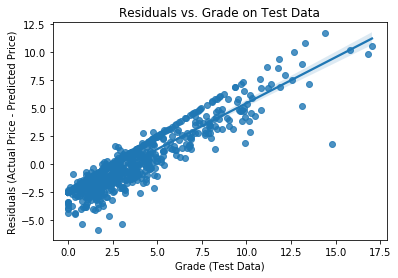

In [364]:
residuals = y_test - y_predicted
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Grade (Test Data)')
ax.set_ylabel('Residuals (Actual Price - Predicted Price)')
ax.set_title("Residuals vs. Grade on Test Data");

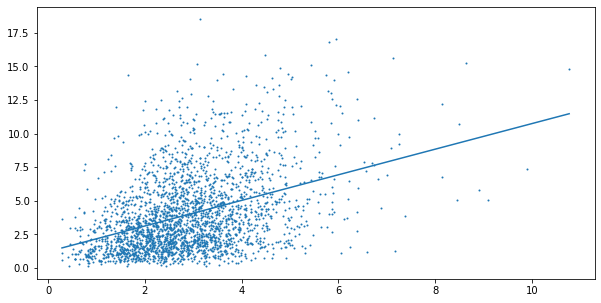

In [365]:
ncaa_grade = (a['NCAA_efgpct']*a['NCAA_fgapg'] + a['NCAA_ft']* a['NCAA_ftapg']).to_numpy()
a['NCAA_Good'] = ncaa_grade
a['NCAA_Good'] = a['NCAA_Good']
a['NBA_Good'] = a['NBA_Good']
n = a[a.NBA_Good != 0]
n = n[n.NCAA_Good != 0]
x = n["NCAA_Good"]
y = n['NBA_Good']
plt.figure(figsize=(10,5)) 
plt.scatter(x,y, s = 1)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))



We can see that there is some association. If you are good in the NCAA you are more likely to be good in the NBA.